In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# fetch data
housing = fetch_california_housing()

In [3]:
# split into train, validate, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [6]:
# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
# create model architecture
model = Sequential([
    Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    Dense(1)
])

In [12]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.3118 - val_loss: 7.0203
Epoch 2/20
363/363 [==============================] - 0s 794us/step - loss: 25.2565 - val_loss: 0.4750
Epoch 3/20
363/363 [==============================] - 0s 790us/step - loss: 0.4262 - val_loss: 0.4178
Epoch 4/20
363/363 [==============================] - 0s 950us/step - loss: 0.3837 - val_loss: 0.4129
Epoch 5/20
363/363 [==============================] - 0s 811us/step - loss: 0.3771 - val_loss: 0.4078
Epoch 6/20
363/363 [==============================] - 0s 813us/step - loss: 0.3812 - val_loss: 0.4027
Epoch 7/20
363/363 [==============================] - 0s 817us/step - loss: 0.3657 - val_loss: 0.4005
Epoch 8/20
363/363 [==============================] - 0s 936us/step - loss: 0.3641 - val_loss: 0.3968
Epoch 9/20
363/363 [==============================] - 0s 794us/step - loss: 0.3700 - val_loss: 0.3926
Epoch 10/20
363/363 [==============================] - 0s 780us/step - loss: 0.3465

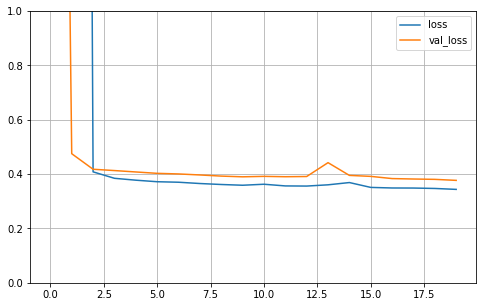

In [16]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 716us/step - loss: 0.3639


In [19]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[2.537294 ],
       [3.2890666],
       [2.3513691]], dtype=float32)

In [37]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Concatenate
from tensorflow.keras.optimizers import SGD

# we can build a more complex model using the keras functional API
input_ = Input(shape=X_train.shape[1:])
hidden1 = Dense(30, activation="relu")(input_)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = Concatenate()([input_, hidden2])
output = Dense(1)(concat)
model = Model(inputs=[input_], outputs=[output])

In [43]:
model.compile(loss="mean_squared_error", optimizer=SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4113 - val_loss: 0.4517
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4146 - val_loss: 0.4406
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3954 - val_loss: 0.4545
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4193 - val_loss: 0.4384
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3975 - val_loss: 0.4530
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4147 - val_loss: 0.4360
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3917 - val_loss: 0.4585
Epoch 8/20
363/363 [==============================] - 0s 995us/step - loss: 0.4059 - val_loss: 0.4356
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3873 - val_loss: 0.4600
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3947 - val_loss: 0.43

In [40]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 722us/step - loss: 0.4733


0.47326692938804626

In [44]:
# now let's try wide and deep with inputs that are split
input_A = Input(shape=[5], name="wide_input")
input_B = Input(shape=[6], name="deep_input")
hidden1 = Dense(30, activation="relu")(input_B)
hidden2 = Dense(30, activation="relu")(hidden1)
concat = Concatenate()([input_A, hidden2])
output = Dense(1, name="output")(concat)
model = Model(inputs=[input_A, input_B], outputs=[output])

In [45]:
model.compile(loss="mse", optimizer=SGD(lr=1e-3))

In [46]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

In [47]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.3999 - val_loss: 1.0689
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9505 - val_loss: 0.7772
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7134 - val_loss: 0.7081
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6614 - val_loss: 0.6674
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6643 - val_loss: 0.6421
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6089 - val_loss: 0.6194
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5927 - val_loss: 0.6011
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5814 - val_loss: 0.5840
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5546 - val_loss: 0.5720
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5391 - val_loss: 0.5629